# Advertising Expenditure Data (Ad$pender)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now you've got all the building blocks you need to start your first data science project in python. Let's imagine that you're Macy's, a department store chain in the US. You spend a lot of money on advertising. Your marketing department tells you that search traffic is the number one way that your website gains visitors. As such, the marketing department has given you their traditional advertising expenditures and google search volume. They'd like you to assess the degree to which offline advertising (e.g., television and out of home ads) drive online marketing goals.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from datetime import date

We're actually going to use an advertising expenditure estimates from the Adspender, a Kantar Media company that estimates advertising costs by monitoring advertising all across the US. Put another way, they pay a bunch of people take notes as they see advertising. They estimate costs based on going rates, and together they can estimate total spend. We subscribe to Adspender as a University and that means you can pull your own Ad$pender data if you like here: https://libguides.colorado.edu/c.php?g=753950&p=5401531

In [ ]:
adspend = pd.read_csv('/content/drive/MyDrive/Time Series Analysis Project/adidas.apsend.csv')

## Data Cleaning

In [ ]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Adidas : Sneakers Men,580.4,0.0,580.4,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,"WEEK OF OCT 07, 2013 (B)",Adidas : Soccer Apparel & Shoes,74.7,0.0,74.7,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,"WEEK OF OCT 07, 2013 (B)",Adidas CrazyQuick : Sneakers Men,10.5,0.0,10.5,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,"WEEK OF OCT 07, 2013 (B)",ADIDAS FACTORY OUTLET : Family,10.1,0.0,0.0,0.0,0.0,0,0.0,0.0,0,10.1,0.0
4,"WEEK OF OCT 07, 2013 (B)",Adidas Shoe Store : Men & Women,0.7,0.0,0.0,0.0,0.0,0,0.0,0.7,0,0.0,0.0


In [ ]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF ", "")

In [ ]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013 (B)",Adidas : Sneakers Men,580.4,0.0,580.4,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,"OCT 07, 2013 (B)",Adidas : Soccer Apparel & Shoes,74.7,0.0,74.7,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,"OCT 07, 2013 (B)",Adidas CrazyQuick : Sneakers Men,10.5,0.0,10.5,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,"OCT 07, 2013 (B)",ADIDAS FACTORY OUTLET : Family,10.1,0.0,0.0,0.0,0.0,0,0.0,0.0,0,10.1,0.0
4,"OCT 07, 2013 (B)",Adidas Shoe Store : Men & Women,0.7,0.0,0.0,0.0,0.0,0,0.0,0.7,0,0.0,0.0


In [ ]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "") #\escape character

<ipython-input-7-997c0c5b1191>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "") #\escape character


In [ ]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013",Adidas : Sneakers Men,580.4,0.0,580.4,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,"OCT 07, 2013",Adidas : Soccer Apparel & Shoes,74.7,0.0,74.7,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,"OCT 07, 2013",Adidas CrazyQuick : Sneakers Men,10.5,0.0,10.5,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,"OCT 07, 2013",ADIDAS FACTORY OUTLET : Family,10.1,0.0,0.0,0.0,0.0,0,0.0,0.0,0,10.1,0.0
4,"OCT 07, 2013",Adidas Shoe Store : Men & Women,0.7,0.0,0.0,0.0,0.0,0,0.0,0.7,0,0.0,0.0


In [ ]:
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "") #\escape character

<ipython-input-9-e38c56ae910d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "") #\escape character


In [ ]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR
0,"OCT 07, 2013",Adidas : Sneakers Men,580.4,0.0,580.4,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,"OCT 07, 2013",Adidas : Soccer Apparel & Shoes,74.7,0.0,74.7,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,"OCT 07, 2013",Adidas CrazyQuick : Sneakers Men,10.5,0.0,10.5,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,"OCT 07, 2013",ADIDAS FACTORY OUTLET : Family,10.1,0.0,0.0,0.0,0.0,0,0.0,0.0,0,10.1,0.0
4,"OCT 07, 2013",Adidas Shoe Store : Men & Women,0.7,0.0,0.0,0.0,0.0,0,0.0,0.7,0,0.0,0.0


In [ ]:
list(adspend)

['TIME PERIOD',
 'PRODUCT',
 'TOTAL',
 'NETWORK TV',
 'CABLE TV',
 'SPOT TV',
 'MAGAZINES',
 'SUNDAY MAGS',
 'NATL NEWSP',
 'NEWSPAPER',
 'NETWORK RADIO',
 'NAT SPOT RADIO',
 'OUTDOOR']

In [ ]:
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])

In [ ]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,FIXED TIME
0,"OCT 07, 2013",Adidas : Sneakers Men,580.4,0.0,580.4,0.0,0.0,0,0.0,0.0,0,0.0,0.0,2013-10-07
1,"OCT 07, 2013",Adidas : Soccer Apparel & Shoes,74.7,0.0,74.7,0.0,0.0,0,0.0,0.0,0,0.0,0.0,2013-10-07
2,"OCT 07, 2013",Adidas CrazyQuick : Sneakers Men,10.5,0.0,10.5,0.0,0.0,0,0.0,0.0,0,0.0,0.0,2013-10-07
3,"OCT 07, 2013",ADIDAS FACTORY OUTLET : Family,10.1,0.0,0.0,0.0,0.0,0,0.0,0.0,0,10.1,0.0,2013-10-07
4,"OCT 07, 2013",Adidas Shoe Store : Men & Women,0.7,0.0,0.0,0.0,0.0,0,0.0,0.7,0,0.0,0.0,2013-10-07


In [ ]:
#Get rid of' 'products and find the total ad spend per week. Like a pivot table in excel
adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

<ipython-input-14-930f6b7105c9>:2: FutureWarning: The operation <function sum at 0x7fd83c082d30> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)


In [ ]:
list(adspendnoproducts) # products column is gone

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'TOTAL']

In [ ]:
adspendnoproducts.index # number of rows reduced to 261 now since we have one row per week

DatetimeIndex(['2013-10-07', '2013-10-14', '2013-10-21', '2013-10-28',
               '2013-11-04', '2013-11-11', '2013-11-18', '2013-11-25',
               '2013-12-02', '2013-12-09',
               ...
               '2018-06-25', '2018-07-02', '2018-07-09', '2018-07-16',
               '2018-07-23', '2018-07-30', '2018-08-20', '2018-08-27',
               '2018-09-17', '2018-10-01'],
              dtype='datetime64[ns]', name='FIXED TIME', length=249, freq=None)

In [ ]:
adspendnoproducts

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,TOTAL
FIXED TIME,,,,,,,,,,,
2013-10-07,665.6,0.0,10.1,77.9,0,0.0,27.2,0.0,0.0,0,780.8
2013-10-14,792.6,0.0,10.1,0.0,0,222.0,5.6,0.0,0.0,0,1030.3
2013-10-21,594.2,0.0,10.1,0.0,0,300.0,9.3,0.0,0.0,0,913.6
2013-10-28,1366.4,715.0,11.5,0.0,0,195.0,4.6,10.8,0.9,0,2304.2
2013-11-04,835.1,0.0,13.5,0.0,0,126.0,8.2,0.0,0.0,0,982.8
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,0.0,0.0,0.7,0.0,0,0.0,0.0,247.5,0.0,0,248.2
2018-08-20,0.0,58.0,0.0,320.5,0,0.0,0.0,0.0,0.0,0,378.5
2018-08-27,0.0,0.0,0.0,0.0,0,0.0,0.0,295.3,0.6,0,295.9


Now that we've clened stuff up, let's graph some adveritising expenditures

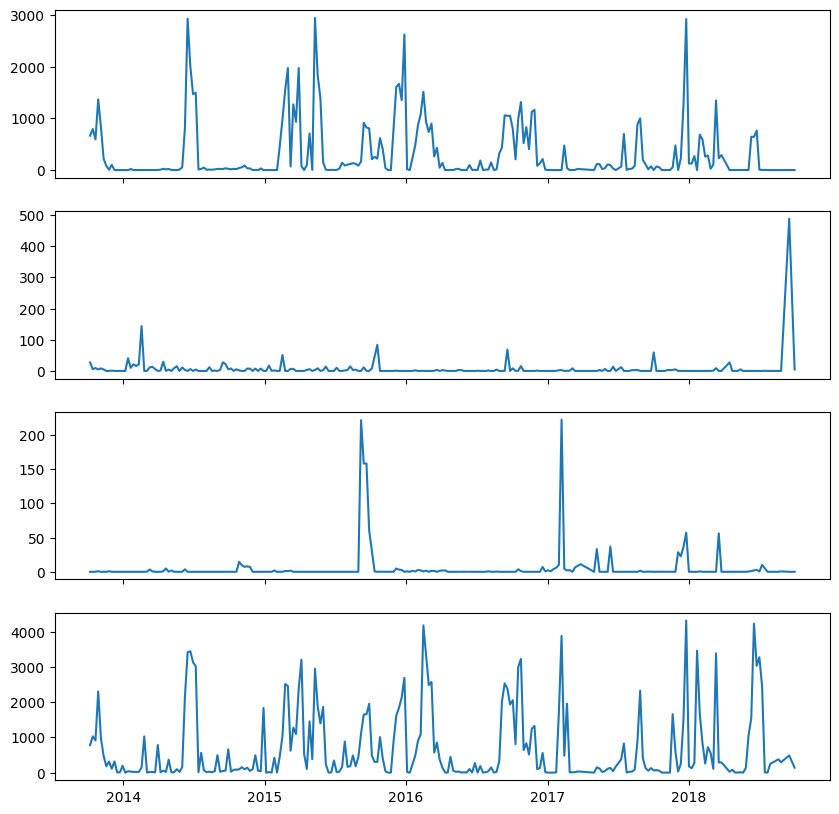

In [ ]:
dimensions = (10, 10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex='all') # have the one x axis printed for all 4 graphs instead of for each graph

ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV']) #Spot cable is one of two basic ways to buy advertising on cable television. It allows regional small-business owners to show their TV ads on national cable networks that air in their local markets without having to buy airtime from those networks.
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])


They seem to ebb and flow together across time, something worth noting as we consider the problem more.

As we prepare our google data, we're going to need weekly measurements that match the AdSpender data. As we looked at the raw date stamps, all measurements started with "WEEK OF," but we need to know what day of the week that the measurement starts. That will help us recreate an identicial weekly count using Google data.

In [ ]:
testdate = pd.to_datetime("2013-10-07")

In [ ]:
testdate.weekday() # this is monday

0

# Loading Google Trends Data

As you'll recall, your marketing department really wants to boost search referral traffic to its website. While we could ideally measure this referral traffic using Google Analytics, Adobe Analytics or any other common website analytics tool, we can also infer search traffic volumes using the Google Trends tool. While there is no official API, there is a pretty cool python scraper here: https://pypi.org/project/pytrends/

Since we don't have access to Macy's website analytics (and why would we), we're going to use Google Trends data as a proxy for the Google search referrals.

In [ ]:
adidas = pd.read_csv('/content/drive/MyDrive/Time Series Analysis Project/adidas.googletrend.csv', skiprows = [0,1], parse_dates=['Week'])

In [ ]:
adidas.set_index('Week', inplace=True)

In [ ]:
adidas.head()

,adidas: (United States)
Week,
2013-10-13,18
2013-10-20,19
2013-10-27,18
2013-11-03,21
2013-11-10,20


In [ ]:
adidas.index = adidas.index + pd.DateOffset(days=1)
adidas = adidas.rename(columns={'adidas: (United States)': 'adidas_GoogleSearch'})

In [ ]:
mergedweeklydata = adspendnoproducts.join(adidas)

Notice that the date column contains dates that increment daily, we need weekly totals, so let's resample the data down to weekly averages. As our AdSpender data, we want our averages to start on Monday

In [ ]:
adidasweekly = adidas.resample('W-MON', closed = 'left', label = 'left').mean()
# first parameter - unit of analysis W-weekly, M-monthly, D- daily, also include start day for averages
# second parameter - where would we close the data. where do we start the week? Left or right? [0 1 2 3 4 5 6]
# third parameter - which label should be used to identify the data?

In [ ]:
adidasweekly.head()

,adidas_GoogleSearch
Week,
2013-10-14,18.0
2013-10-21,19.0
2013-10-28,18.0
2013-11-04,21.0
2013-11-11,20.0


The only reason .join works so well is because the indices are identical.

In [ ]:
adidasweeklydata = adspendnoproducts.join(adidasweekly)

In [ ]:
adidasweeklydata

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,TOTAL,adidas_GoogleSearch
FIXED TIME,,,,,,,,,,,,
2013-10-07,665.6,0.0,10.1,77.9,0,0.0,27.2,0.0,0.0,0,780.8,NaN
2013-10-14,792.6,0.0,10.1,0.0,0,222.0,5.6,0.0,0.0,0,1030.3,18.0
2013-10-21,594.2,0.0,10.1,0.0,0,300.0,9.3,0.0,0.0,0,913.6,19.0
2013-10-28,1366.4,715.0,11.5,0.0,0,195.0,4.6,10.8,0.9,0,2304.2,18.0
2013-11-04,835.1,0.0,13.5,0.0,0,126.0,8.2,0.0,0.0,0,982.8,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,0.0,0.0,0.7,0.0,0,0.0,0.0,247.5,0.0,0,248.2,62.0
2018-08-20,0.0,58.0,0.0,320.5,0,0.0,0.0,0.0,0.0,0,378.5,56.0
2018-08-27,0.0,0.0,0.0,0.0,0,0.0,0.0,295.3,0.6,0,295.9,50.0


Text(0.5, 1.0, 'value')

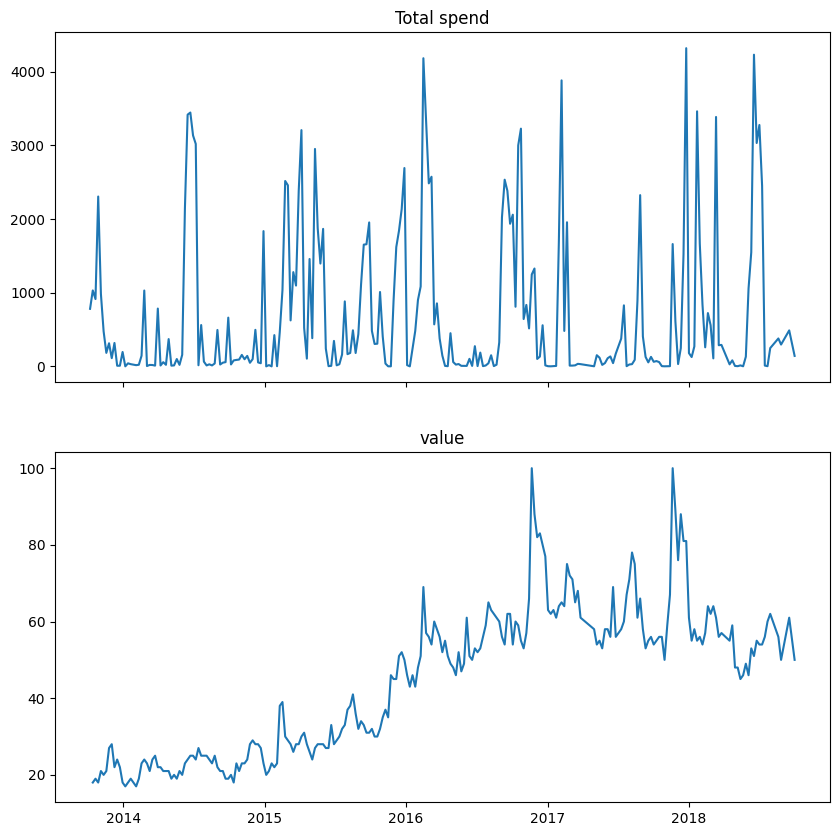

In [ ]:
dimensions = (10, 10)
fig, (ax1, ax2) = pyplot.subplots(2, figsize = dimensions, sharex = 'all')

ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax1.set_title('Total spend')
ax2.plot(mergedweeklydata.index, mergedweeklydata['adidas_GoogleSearch'])
ax2.set_title('value')

In [ ]:
dimensions = (10, 10)
fig, (ax1, ax2) = pyplot.subplots(2, figsize = dimensions, sharex = 'all')

ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

In [ ]:
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])

We need stationary data to do modeling, but there is a slight downward trend in the first graph

In [ ]:
mergedweeklydata['TOTALdiff'] = mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)
#we can run a regression on these variables now, to understand if the adspend predicts the google search interests

In [ ]:
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,TOTALdiff,valuediff
FIXED TIME,,,,,,,,,,,,,,,,
2013-10-07,920.3,194.5,116.7,334.9,485.9,3880.9,5296.4,0.0,117.7,0.0,364.2,11711.7,3.0,4984.998247,NaN,NaN
2013-10-14,1376.9,194.5,116.7,439.0,485.9,3394.9,3756.4,0.0,44.6,0.0,138.5,9947.5,10.0,5092.498522,-1764.2,107.500275
2013-10-21,1599.4,176.8,116.7,260.3,485.9,3465.8,6269.9,0.0,234.5,0.0,750.9,13360.4,17.0,5333.864822,3412.9,241.366300
2013-10-28,732.5,6425.8,181.5,925.7,495.0,1853.7,6875.8,364.3,157.8,235.6,174.3,18422.0,24.0,4860.332165,5061.6,-473.532657
2013-11-04,1962.0,194.5,267.8,1328.3,507.0,4011.5,7087.7,0.0,205.2,0.0,685.1,16249.1,31.0,5886.632084,-2172.9,1026.299919


In [ ]:
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

0.28543532190979437

The correlation holds even after differencing, suggesting we might be able to find a relationship in the data

In [ ]:
mergedweeklydata.to_csv('adspend.googletrends.weekly.csv')

Often in science, we want to know if one variable causes a change in another. One of the things we want to see to imply that this is actually happening is causality. Causality implies there is a time lag in adspend to googletrends values. That lag allows us to rule out the fact that the two variables are simply rising and falling together given some external factor. If both X and y increase at the same time, there could be an external factor like the economy, driving both changes. Next week we'll experiment with adding in lags to our X variables.